In [1]:
from pykalman import KalmanFilter
import numpy as np
import matplotlib.pyplot as plt
from numpy import ma
import pandas as pd
import os
import sklearn
import warnings
from pathlib import Path
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator

# pytorch imports
import torch
from torch.utils.data.sampler import SequentialSampler, Sampler
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import Dataset
import torch.nn as nn

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import math
# Import the preprocesser module
import preprocessor 
from importlib import reload

# import Transformer module
import ts_transformer as ts
reload(preprocessor)
#reload(ts_transformer)
reload(ts)
# Import our torch_utils module
import torch_utils
reload(torch_utils)
# Import sklean_utils module
import sklearn_utils
reload(sklearn_utils)

<module 'sklearn_utils' from 'C:\\Users\\Alec\\OneDrive\\Documents\\Syracuse\\IST707-DataAnalytics\\project\\sklearn_utils.py'>

In [2]:
# get the device available
# Ideally we want a GPU to speed up the training
_device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

print(_device)

cuda


In [3]:
# Set the path to the cleaned data directory
path2 = Path('C:/Users/Alec/OneDrive/Documents/Syracuse/IST707-DataAnalytics/project/.data/bejing_air_quality/cleaned')
cleaned_files = list(path2.glob("*.csv"))
train_files = cleaned_files[:int(len(cleaned_files) * 0.8)]
test_files = cleaned_files[int(len(cleaned_files) * 0.8):]

In [4]:
# Inititialize our bejing pipeline
pipeline = sklearn_utils.bejing_pipeline()

In [5]:
# Inspect the pipeline
pipeline

ColumnTransformer(transformers=[('y',
                                 Pipeline(steps=[('yscaler',
                                                  StandardScaler())]),
                                 ['PM2.5']),
                                ('wd',
                                 Pipeline(steps=[('wd',
                                                  <sklearn_utils.WindVector object at 0x00000230547F6548>)]),
                                 ['wd', 'WSPM']),
                                ('X',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP',
                                  'PRES', 'DEWP', 'RAIN']),
                                ('time',
                                 Pipeline(steps=[('cos_sin',
                                                  <sklearn_utils.TimeCosSin object at 0x00000230547F6108>)]),
                                 ['timestamp']),
              

# Fit the pipeline on all training data and transform the training data

In [7]:
# Initialize a dummy datafrmae to concat all datata
main_df = pd.DataFrame()
for file in train_files:
    df = pd.read_csv(file)
    if not main_df.empty:
        main_df = pd.concat([main_df, df])
    else:
        main_df = df

print(main_df.columns)
print(main_df.shape)
# pass the concateneated data to the pipeline
pipeline = pipeline.fit(main_df)
# transform each file with the pipeline and write it
for file in train_files:
    file_name = os.path.basename(file)
    train_dir = "train"
    
    df = pd.read_csv(file)
    vals = pipeline.transform(df)
    columns = preprocessor.get_feature_names(pipeline)
    print(len(columns))
    print(columns)
    #print(vals[:5])
    new_df = pd.DataFrame(vals, columns=columns)
    out_dir = path2.joinpath(train_dir, file_name)
    print(new_df.shape)
    print("Writing.. {}".format(out_dir))
    new_df.to_csv(out_dir, index=False)

Index(['timestamp', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES',
       'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')
(315576, 14)


C:\Users\Alec\OneDrive\Documents\Syracuse\IST707-DataAnalytics\project\preprocessor.py:335: UserWarning: Transformer yscaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  % (str(name), type(trans).__name__))
C:\Users\Alec\OneDrive\Documents\Syracuse\IST707-DataAnalytics\project\preprocessor.py:335: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  % (str(name), type(trans).__name__))


27
['y__PM2.5', 'wd__Wx', 'wd__Wy', 'X__PM10', 'X__SO2', 'X__NO2', 'X__CO', 'X__O3', 'X__TEMP', 'X__PRES', 'X__DEWP', 'X__RAIN', 'cos_sin__Hour sin', 'cos_sin__Hour cos', 'cos_sin__Day sin', 'cos_sin__Day cos', 'cos_sin__Year sin', 'cos_sin__Year cos', 'cat__x0_Aotizhongxin', 'cat__x0_Changping', 'cat__x0_Dingling', 'cat__x0_Dongsi', 'cat__x0_Guanyuan', 'cat__x0_Gucheng', 'cat__x0_Huairou', 'cat__x0_Nongzhanguan', 'cat__x0_Shunyi']
(35064, 27)
Writing.. C:\Users\Alec\OneDrive\Documents\Syracuse\IST707-DataAnalytics\project\.data\bejing_air_quality\cleaned\train\PRSA_Data_Aotizhongxin_20130301-20170228.csv


C:\Users\Alec\OneDrive\Documents\Syracuse\IST707-DataAnalytics\project\preprocessor.py:335: UserWarning: Transformer yscaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  % (str(name), type(trans).__name__))
C:\Users\Alec\OneDrive\Documents\Syracuse\IST707-DataAnalytics\project\preprocessor.py:335: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  % (str(name), type(trans).__name__))


27
['y__PM2.5', 'wd__Wx', 'wd__Wy', 'X__PM10', 'X__SO2', 'X__NO2', 'X__CO', 'X__O3', 'X__TEMP', 'X__PRES', 'X__DEWP', 'X__RAIN', 'cos_sin__Hour sin', 'cos_sin__Hour cos', 'cos_sin__Day sin', 'cos_sin__Day cos', 'cos_sin__Year sin', 'cos_sin__Year cos', 'cat__x0_Aotizhongxin', 'cat__x0_Changping', 'cat__x0_Dingling', 'cat__x0_Dongsi', 'cat__x0_Guanyuan', 'cat__x0_Gucheng', 'cat__x0_Huairou', 'cat__x0_Nongzhanguan', 'cat__x0_Shunyi']
(35064, 27)
Writing.. C:\Users\Alec\OneDrive\Documents\Syracuse\IST707-DataAnalytics\project\.data\bejing_air_quality\cleaned\train\PRSA_Data_Changping_20130301-20170228.csv


C:\Users\Alec\OneDrive\Documents\Syracuse\IST707-DataAnalytics\project\preprocessor.py:335: UserWarning: Transformer yscaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  % (str(name), type(trans).__name__))
C:\Users\Alec\OneDrive\Documents\Syracuse\IST707-DataAnalytics\project\preprocessor.py:335: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  % (str(name), type(trans).__name__))


27
['y__PM2.5', 'wd__Wx', 'wd__Wy', 'X__PM10', 'X__SO2', 'X__NO2', 'X__CO', 'X__O3', 'X__TEMP', 'X__PRES', 'X__DEWP', 'X__RAIN', 'cos_sin__Hour sin', 'cos_sin__Hour cos', 'cos_sin__Day sin', 'cos_sin__Day cos', 'cos_sin__Year sin', 'cos_sin__Year cos', 'cat__x0_Aotizhongxin', 'cat__x0_Changping', 'cat__x0_Dingling', 'cat__x0_Dongsi', 'cat__x0_Guanyuan', 'cat__x0_Gucheng', 'cat__x0_Huairou', 'cat__x0_Nongzhanguan', 'cat__x0_Shunyi']
(35064, 27)
Writing.. C:\Users\Alec\OneDrive\Documents\Syracuse\IST707-DataAnalytics\project\.data\bejing_air_quality\cleaned\train\PRSA_Data_Dingling_20130301-20170228.csv


C:\Users\Alec\OneDrive\Documents\Syracuse\IST707-DataAnalytics\project\preprocessor.py:335: UserWarning: Transformer yscaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  % (str(name), type(trans).__name__))
C:\Users\Alec\OneDrive\Documents\Syracuse\IST707-DataAnalytics\project\preprocessor.py:335: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  % (str(name), type(trans).__name__))


27
['y__PM2.5', 'wd__Wx', 'wd__Wy', 'X__PM10', 'X__SO2', 'X__NO2', 'X__CO', 'X__O3', 'X__TEMP', 'X__PRES', 'X__DEWP', 'X__RAIN', 'cos_sin__Hour sin', 'cos_sin__Hour cos', 'cos_sin__Day sin', 'cos_sin__Day cos', 'cos_sin__Year sin', 'cos_sin__Year cos', 'cat__x0_Aotizhongxin', 'cat__x0_Changping', 'cat__x0_Dingling', 'cat__x0_Dongsi', 'cat__x0_Guanyuan', 'cat__x0_Gucheng', 'cat__x0_Huairou', 'cat__x0_Nongzhanguan', 'cat__x0_Shunyi']
(35064, 27)
Writing.. C:\Users\Alec\OneDrive\Documents\Syracuse\IST707-DataAnalytics\project\.data\bejing_air_quality\cleaned\train\PRSA_Data_Dongsi_20130301-20170228.csv


C:\Users\Alec\OneDrive\Documents\Syracuse\IST707-DataAnalytics\project\preprocessor.py:335: UserWarning: Transformer yscaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  % (str(name), type(trans).__name__))
C:\Users\Alec\OneDrive\Documents\Syracuse\IST707-DataAnalytics\project\preprocessor.py:335: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  % (str(name), type(trans).__name__))


27
['y__PM2.5', 'wd__Wx', 'wd__Wy', 'X__PM10', 'X__SO2', 'X__NO2', 'X__CO', 'X__O3', 'X__TEMP', 'X__PRES', 'X__DEWP', 'X__RAIN', 'cos_sin__Hour sin', 'cos_sin__Hour cos', 'cos_sin__Day sin', 'cos_sin__Day cos', 'cos_sin__Year sin', 'cos_sin__Year cos', 'cat__x0_Aotizhongxin', 'cat__x0_Changping', 'cat__x0_Dingling', 'cat__x0_Dongsi', 'cat__x0_Guanyuan', 'cat__x0_Gucheng', 'cat__x0_Huairou', 'cat__x0_Nongzhanguan', 'cat__x0_Shunyi']
(35064, 27)
Writing.. C:\Users\Alec\OneDrive\Documents\Syracuse\IST707-DataAnalytics\project\.data\bejing_air_quality\cleaned\train\PRSA_Data_Guanyuan_20130301-20170228.csv


C:\Users\Alec\OneDrive\Documents\Syracuse\IST707-DataAnalytics\project\preprocessor.py:335: UserWarning: Transformer yscaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  % (str(name), type(trans).__name__))
C:\Users\Alec\OneDrive\Documents\Syracuse\IST707-DataAnalytics\project\preprocessor.py:335: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  % (str(name), type(trans).__name__))


27
['y__PM2.5', 'wd__Wx', 'wd__Wy', 'X__PM10', 'X__SO2', 'X__NO2', 'X__CO', 'X__O3', 'X__TEMP', 'X__PRES', 'X__DEWP', 'X__RAIN', 'cos_sin__Hour sin', 'cos_sin__Hour cos', 'cos_sin__Day sin', 'cos_sin__Day cos', 'cos_sin__Year sin', 'cos_sin__Year cos', 'cat__x0_Aotizhongxin', 'cat__x0_Changping', 'cat__x0_Dingling', 'cat__x0_Dongsi', 'cat__x0_Guanyuan', 'cat__x0_Gucheng', 'cat__x0_Huairou', 'cat__x0_Nongzhanguan', 'cat__x0_Shunyi']
(35064, 27)
Writing.. C:\Users\Alec\OneDrive\Documents\Syracuse\IST707-DataAnalytics\project\.data\bejing_air_quality\cleaned\train\PRSA_Data_Gucheng_20130301-20170228.csv


C:\Users\Alec\OneDrive\Documents\Syracuse\IST707-DataAnalytics\project\preprocessor.py:335: UserWarning: Transformer yscaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  % (str(name), type(trans).__name__))
C:\Users\Alec\OneDrive\Documents\Syracuse\IST707-DataAnalytics\project\preprocessor.py:335: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  % (str(name), type(trans).__name__))


27
['y__PM2.5', 'wd__Wx', 'wd__Wy', 'X__PM10', 'X__SO2', 'X__NO2', 'X__CO', 'X__O3', 'X__TEMP', 'X__PRES', 'X__DEWP', 'X__RAIN', 'cos_sin__Hour sin', 'cos_sin__Hour cos', 'cos_sin__Day sin', 'cos_sin__Day cos', 'cos_sin__Year sin', 'cos_sin__Year cos', 'cat__x0_Aotizhongxin', 'cat__x0_Changping', 'cat__x0_Dingling', 'cat__x0_Dongsi', 'cat__x0_Guanyuan', 'cat__x0_Gucheng', 'cat__x0_Huairou', 'cat__x0_Nongzhanguan', 'cat__x0_Shunyi']
(35064, 27)
Writing.. C:\Users\Alec\OneDrive\Documents\Syracuse\IST707-DataAnalytics\project\.data\bejing_air_quality\cleaned\train\PRSA_Data_Huairou_20130301-20170228.csv


C:\Users\Alec\OneDrive\Documents\Syracuse\IST707-DataAnalytics\project\preprocessor.py:335: UserWarning: Transformer yscaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  % (str(name), type(trans).__name__))
C:\Users\Alec\OneDrive\Documents\Syracuse\IST707-DataAnalytics\project\preprocessor.py:335: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  % (str(name), type(trans).__name__))


27
['y__PM2.5', 'wd__Wx', 'wd__Wy', 'X__PM10', 'X__SO2', 'X__NO2', 'X__CO', 'X__O3', 'X__TEMP', 'X__PRES', 'X__DEWP', 'X__RAIN', 'cos_sin__Hour sin', 'cos_sin__Hour cos', 'cos_sin__Day sin', 'cos_sin__Day cos', 'cos_sin__Year sin', 'cos_sin__Year cos', 'cat__x0_Aotizhongxin', 'cat__x0_Changping', 'cat__x0_Dingling', 'cat__x0_Dongsi', 'cat__x0_Guanyuan', 'cat__x0_Gucheng', 'cat__x0_Huairou', 'cat__x0_Nongzhanguan', 'cat__x0_Shunyi']
(35064, 27)
Writing.. C:\Users\Alec\OneDrive\Documents\Syracuse\IST707-DataAnalytics\project\.data\bejing_air_quality\cleaned\train\PRSA_Data_Nongzhanguan_20130301-20170228.csv


C:\Users\Alec\OneDrive\Documents\Syracuse\IST707-DataAnalytics\project\preprocessor.py:335: UserWarning: Transformer yscaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  % (str(name), type(trans).__name__))
C:\Users\Alec\OneDrive\Documents\Syracuse\IST707-DataAnalytics\project\preprocessor.py:335: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  % (str(name), type(trans).__name__))


27
['y__PM2.5', 'wd__Wx', 'wd__Wy', 'X__PM10', 'X__SO2', 'X__NO2', 'X__CO', 'X__O3', 'X__TEMP', 'X__PRES', 'X__DEWP', 'X__RAIN', 'cos_sin__Hour sin', 'cos_sin__Hour cos', 'cos_sin__Day sin', 'cos_sin__Day cos', 'cos_sin__Year sin', 'cos_sin__Year cos', 'cat__x0_Aotizhongxin', 'cat__x0_Changping', 'cat__x0_Dingling', 'cat__x0_Dongsi', 'cat__x0_Guanyuan', 'cat__x0_Gucheng', 'cat__x0_Huairou', 'cat__x0_Nongzhanguan', 'cat__x0_Shunyi']
(35064, 27)
Writing.. C:\Users\Alec\OneDrive\Documents\Syracuse\IST707-DataAnalytics\project\.data\bejing_air_quality\cleaned\train\PRSA_Data_Shunyi_20130301-20170228.csv


In [8]:
print(len(new_df.columns))
print(new_df.columns)


27
Index(['y__PM2.5', 'wd__Wx', 'wd__Wy', 'X__PM10', 'X__SO2', 'X__NO2', 'X__CO',
       'X__O3', 'X__TEMP', 'X__PRES', 'X__DEWP', 'X__RAIN',
       'cos_sin__Hour sin', 'cos_sin__Hour cos', 'cos_sin__Day sin',
       'cos_sin__Day cos', 'cos_sin__Year sin', 'cos_sin__Year cos',
       'cat__x0_Aotizhongxin', 'cat__x0_Changping', 'cat__x0_Dingling',
       'cat__x0_Dongsi', 'cat__x0_Guanyuan', 'cat__x0_Gucheng',
       'cat__x0_Huairou', 'cat__x0_Nongzhanguan', 'cat__x0_Shunyi'],
      dtype='object')


In [9]:
# transform the test data with the pipeline
for file in test_files:
    file_name = os.path.basename(file)
    test_dir = "test"
    
    df = pd.read_csv(file)
    vals = pipeline.transform(df)
    columns = preprocessor.get_feature_names(pipeline)
    new_df = pd.DataFrame(vals, columns=columns)
    out_dir = path2.joinpath(test_dir, file_name)
    print(new_df.shape)
    print("Writing.. {}".format(out_dir))
    new_df.to_csv(out_dir, index=False)

C:\Users\Alec\OneDrive\Documents\Syracuse\IST707-DataAnalytics\project\preprocessor.py:335: UserWarning: Transformer yscaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  % (str(name), type(trans).__name__))
C:\Users\Alec\OneDrive\Documents\Syracuse\IST707-DataAnalytics\project\preprocessor.py:335: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  % (str(name), type(trans).__name__))


(35064, 27)
Writing.. C:\Users\Alec\OneDrive\Documents\Syracuse\IST707-DataAnalytics\project\.data\bejing_air_quality\cleaned\test\PRSA_Data_Tiantan_20130301-20170228.csv


C:\Users\Alec\OneDrive\Documents\Syracuse\IST707-DataAnalytics\project\preprocessor.py:335: UserWarning: Transformer yscaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  % (str(name), type(trans).__name__))
C:\Users\Alec\OneDrive\Documents\Syracuse\IST707-DataAnalytics\project\preprocessor.py:335: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  % (str(name), type(trans).__name__))


(35064, 27)
Writing.. C:\Users\Alec\OneDrive\Documents\Syracuse\IST707-DataAnalytics\project\.data\bejing_air_quality\cleaned\test\PRSA_Data_Wanliu_20130301-20170228.csv


C:\Users\Alec\OneDrive\Documents\Syracuse\IST707-DataAnalytics\project\preprocessor.py:335: UserWarning: Transformer yscaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  % (str(name), type(trans).__name__))
C:\Users\Alec\OneDrive\Documents\Syracuse\IST707-DataAnalytics\project\preprocessor.py:335: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  % (str(name), type(trans).__name__))


(35064, 27)
Writing.. C:\Users\Alec\OneDrive\Documents\Syracuse\IST707-DataAnalytics\project\.data\bejing_air_quality\cleaned\test\PRSA_Data_Wanshouxigong_20130301-20170228.csv


In [ ]:
columns

In [12]:
# Load the training dataset into a torch DataLoader
path = "C:\\Users\\Alec\\OneDrive\\Documents\\Syracuse\\IST707-DataAnalytics\\project\\.data\\bejing_air_quality\\cleaned\\"
bej_ds2 = torch_utils.BejingAirDataset(path)
train_dl2 = torch_utils.get_dataloader2(bej_ds2,device=_device)

In [13]:
# Size of X and y tensors
for x, y in train_dl2:
    print(x.size())
    print(y.size())
    break

torch.Size([1, 35064, 26])
torch.Size([1, 35064, 1])


In [17]:
criterion = nn.MSELoss().to(_device)
optimizer = torch.optim.Adam(model_loaded.parameters())

In [ ]:
# Create the model, loss func, and optimizer
model = ts.TransAm(feature_size=26, max_enc_len=5000, device=_device, heads=2)
criterion = nn.MSELoss().to(_device)
optimizer = torch.optim.Adam(model.parameters())
#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0)

#def train_model(m)
# train the model over 100 epochs
for epoch in range(100):
    running_loss = 0.0
    losses = []
    for i, data in enumerate(train_dl2):

        # get the inputs; data is a list of [inputs, labels]
        inputs, y = data[0].to(_device), data[1].to(_device)
        inputs = inputs.float()
        y = y.float()
        # zero the paramter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()

        # print statistics
        losses.append(loss.item())
        running_loss += loss.item()
        #print("batch: {} ! loss: {}".format(i, running_loss))

        if i % 9 == 8:
            print('[%d, %5d], total_loss %.3f,  lossL %.3f' %
                  (epoch + 1, i + 1, running_loss, running_loss / 9))
            running_loss = 0.0
# save the model            
torch.save(model, "./.models/transformer_final_1.pth")

In [10]:
# load the trained model into the notebook
model_loaded = torch.load("./.models/transformer_final_1.pth")

In [264]:
# Target tensors
for x, y in train_dl2:
    #print(x.columns)
    #print(x.size())
    print("Features:")
    print(x.size())
    print(x)
    print("Targets:")
    print(y.size())
    print(y)
    break

PRSA_Data_Aotizhongxin_20130301-20170228.csv
Features:
torch.Size([1, 35064, 26])
tensor([[[ 3.9878e+00, -1.8595e+00, -1.0804e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [ 4.7000e+00, -1.1512e-15, -1.0369e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [ 5.0753e+00, -2.3667e+00, -1.0478e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         ...,
         [ 7.7782e-01, -7.7782e-01, -7.2170e-01,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [ 1.0876e+00, -5.0714e-01, -6.4562e-01,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [ 1.1782e+00,  5.4940e-01, -7.8691e-01,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00]]], device='cuda:0')
Targets:
torch.Size([1, 35064, 1])
tensor([[[-0.9307],
         [-0.8810],
         [-0.8935],
         ...,
         [-0.7817],
         [-0.7196],
         [-0.7445]]], device='cuda:0')


In [14]:
# Load the test data
bej_ds3 = torch_utils.BejingAirDataset(path, train=False)
train_dl3 = torch_utils.get_dataloader2(bej_ds3,device=_device)

In [186]:
# predict on the test data
for X, y in train_dl3:
    X = X.float()
    y = y.float()
    model_loaded.eval()
    preds = model_loaded(X)
    print(criterion(preds, y))
    

tensor(0.0836, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1167, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1545, device='cuda:0', grad_fn=<MseLossBackward>)


In [187]:
# get the predictions and true ys as arrays
pred_y = preds.detach().cpu().numpy().reshape(-1)
ys = y.cpu().numpy().reshape(-1)

In [188]:
# unscale the data to get true prediction
unscaled_preds = pipeline.named_transformers_["y"].inverse_transform(pred_y)

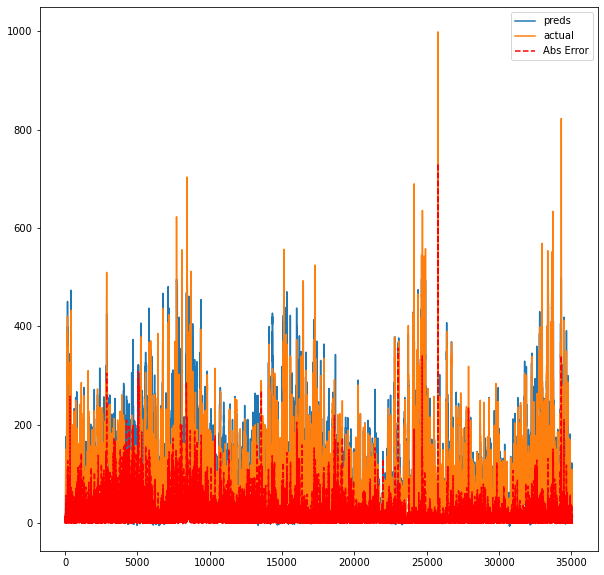

In [190]:
import matplotlib.pyplot as plt
x = np.arange(len(unscaled_preds))
unscaled_y = pipeline.named_transformers_["y"].inverse_transform(y.cpu().numpy().reshape(-1))
fig = plt.figure(figsize=(10, 10))
plt.plot(x, unscaled_preds, label="preds")
plt.plot(x, unscaled_y, label="actual")
plt.plot(x, np.abs(unscaled_y - unscaled_preds), "r--", label="Abs Error")
plt.legend()
plt.show()

In [191]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

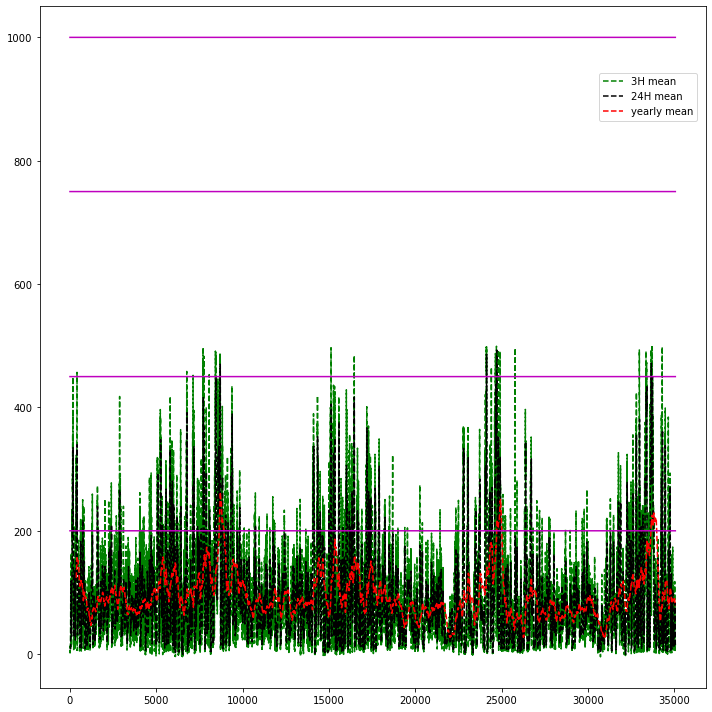

In [192]:
fig = plt.figure(figsize=(10, 10))
# plt.plot(x, unscaled_preds, label="preds")
# plt.plot(x, unscaled_y, label="actual")
# plt.plot(x, np.abs(unscaled_y - unscaled_preds), "r--", label="Abs Error")

plt.plot(x, np.array([[None for _ in range(2)] + moving_average(unscaled_preds, 3).tolist()]).reshape(-1), 'g--', label="3H mean")
plt.plot(x, np.array([[None for _ in range(23)] + moving_average(unscaled_preds, 24).tolist()]).reshape(-1), 'k--', label="24H mean")
plt.plot(x, np.array([[None for _ in range(364)] + moving_average(unscaled_preds, 365).tolist()]).reshape(-1), 'r--', label="yearly mean")
plt.plot(x, [200 for _ in range(len(x))], "m")

plt.plot(x, [450 for _ in range(len(x))], "m")
plt.plot(x, [750 for _ in range(len(x))], "m")
plt.plot(x, [1000 for _ in range(len(x))], "m")

plt.tight_layout()
fig.legend(bbox_to_anchor=(0.98, 0.9))
plt.savefig("./.images/rolling_mean_preds_vs_thresholds.png");

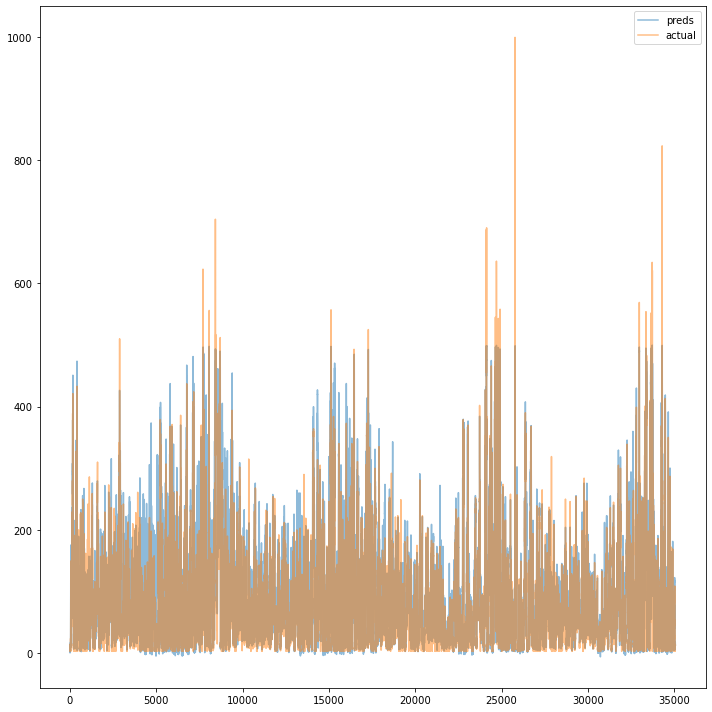

In [194]:
fig = plt.figure(figsize=(10, 10))
plt.plot(x, unscaled_preds, label="preds", alpha=0.5)
plt.plot(x, unscaled_y, label="actual", alpha=0.5)
plt.legend()
plt.tight_layout()
#plt.show()
plt.savefig("./.images/preds_actuals_transformer.png");

In [50]:
yearly_avg = moving_average(unscaled_preds, 365)
yearly_avg[yearly_avg > 275]

array([], dtype=float64)

In [52]:
daily_avg = moving_average(unscaled_preds, 24)
daily_avg[daily_avg > 500]

array([], dtype=float64)

In [54]:
three_avg = moving_average(unscaled_preds, 3)
three_avg[three_avg > 800]

array([], dtype=float64)

In [56]:
unscaled_preds[unscaled_preds > 1000]

array([], dtype=float32)

In [58]:
bej_ds3.files

['C:\\Users\\Alec\\OneDrive\\Documents\\Syracuse\\IST707-DataAnalytics\\project\\.data\\bejing_air_quality\\cleaned\\test\\PRSA_Data_Tiantan_20130301-20170228.csv',
 'C:\\Users\\Alec\\OneDrive\\Documents\\Syracuse\\IST707-DataAnalytics\\project\\.data\\bejing_air_quality\\cleaned\\test\\PRSA_Data_Wanliu_20130301-20170228.csv',
 'C:\\Users\\Alec\\OneDrive\\Documents\\Syracuse\\IST707-DataAnalytics\\project\\.data\\bejing_air_quality\\cleaned\\test\\PRSA_Data_Wanshouxigong_20130301-20170228.csv']

In [59]:
out_path = Path("C:\\Users\\Alec\\OneDrive\\Documents\\Syracuse\\IST707-DataAnalytics\\project\\.data\\bejing_air_quality\\predictions")

In [75]:
out_path

WindowsPath('C:/Users/Alec/OneDrive/Documents/Syracuse/IST707-DataAnalytics/project/.data/bejing_air_quality/predictions')

In [96]:
cols = ["PM2.5"]
periods = [3, 24, 365*24]
cols = cols + ["rolling_{0}_mean".format(n) for n in periods]
test_losses = []
for file, (X, y) in zip(bej_ds3.files, train_dl3):
    file = os.path.basename(file)
    X = X.float()
    y = y.float()
    model_loaded.eval()
    preds = model_loaded(X)
    t_loss = torch.sqrt(criterion(preds, y)) 
    test_losses.append(t_loss)
    print("RMSE:", t_loss)
    
    pred_y = preds.detach().cpu().numpy().reshape(-1) # drop first axis
    ys = y.cpu().numpy().reshape(-1) # drop first axis
    unscaled_preds = pipeline.named_transformers_["y"].inverse_transform(pred_y)
    
    
    mas = [moving_average(unscaled_preds, n) for n in periods]
    pads = [[None for _ in range(n-1)] for n in periods]
    mas_padded = [pad + ma.tolist() for ma, pad in zip(mas, pads)]
    mas_series = [pd.Series(ma) for ma in mas_padded]
    
    
#     ma_3h = pd.Series(moving_average(unscaled_preds, 3))
#     ma_24h = pd.Series(moving_average(unscaled_preds, 24))
#     ma_month = pd.Series(moving_average(unscaled_preds, int(24*30.5)))
#     ma_yr = pd.Series(moving_average(unscaled_preds, 365))
    pdf = pd.DataFrame(unscaled_preds)
    combined = pd.concat([pdf, *mas_series], axis=1 )
    combined.columns = cols
    print("Writing", file)
    print("Cols", combined.columns)
    combined.to_csv(out_path.joinpath(file))
    
    

RMSE: tensor(0.2891, device='cuda:0', grad_fn=<SqrtBackward>)
Writing PRSA_Data_Tiantan_20130301-20170228.csv
Cols Index(['PM2.5', 'rolling_3_mean', 'rolling_24_mean', 'rolling_8760_mean'], dtype='object')
RMSE: tensor(0.3416, device='cuda:0', grad_fn=<SqrtBackward>)
Writing PRSA_Data_Wanliu_20130301-20170228.csv
Cols Index(['PM2.5', 'rolling_3_mean', 'rolling_24_mean', 'rolling_8760_mean'], dtype='object')
RMSE: tensor(0.3930, device='cuda:0', grad_fn=<SqrtBackward>)
Writing PRSA_Data_Wanshouxigong_20130301-20170228.csv
Cols Index(['PM2.5', 'rolling_3_mean', 'rolling_24_mean', 'rolling_8760_mean'], dtype='object')


In [20]:
unscaled_preds = pipeline.named_transformers_["y"].inverse_transform(pred_y)

In [91]:
print("Mean Test RMSE", torch.mean(torch.Tensor(test_losses)))

Mean Test RMSE tensor(0.3412)


In [ ]:
periods = [1] + periods

In [149]:
thresholds = [1000, 750, 450, 200]
regs = {k:v for k, v in zip(periods, thresholds)}
print(regs)

{1: 1000, 3: 750, 24: 450, 8760: 200}


In [181]:
rev = 45 * 1000000
print(rev)
penalties = [100000, 500000, 1000000, int(rev * 0.45)]

45000000


In [182]:

out_files = list(out_path.glob("*.csv"))
all_breaches = {}
for path in out_files:
    df = pd.read_csv(path, index_col=0)
    file = os.path.basename(path)
    #print(df.head())
    breaches = {}
    for col, n in zip(cols,periods):
        n_breaches = {}
        thresh = regs[n]
        ser = df[col]
        trues = ser > thresh
        print(n, np.sum(trues))
        true_ser = ser[trues]
        n_breaches["indicies"] = true_ser.index.to_numpy()
        n_breaches["values"] = true_ser.values
        breaches[n] = n_breaches
        
        
    all_breaches[file] = breaches

1 0
3 0
24 63
8760 0
1 0
3 0
24 39
8760 0
1 0
3 0
24 58
8760 0


In [183]:
os.path.basename(out_path)

'predictions'

In [184]:
for file, d in all_breaches.items():
    print("*"*75)
    print("{} Forecaseted Pollution Cost:".format(file))
    total_cost = 0 
    for (n, breaches), penalty in zip(d.items(), penalties):
        breaks = len(breaches["indicies"])
        fine =  breaks * penalty
        print("Threshold for {} periods costs ${:,.2f} on {} violations".format(n, fine, breaks))
        
        total_cost += fine
        
    
    print("Total Forecasted Pollution Fine (2013-2017): ${:,.2f}".format(total_cost))
    annual_cost = total_cost / (len(pred_y) / (365*24))
    print("Cost Per Year ${:,.2f}/year".format(annual_cost))
    print("{:.2f}% Of Yearly Projected Revenues\n".format((annual_cost / rev) * 100))

***************************************************************************
PRSA_Data_Tiantan_20130301-20170228.csv Forecaseted Pollution Cost:
Threshold for 1 periods costs $0.00 on 0 violations
Threshold for 3 periods costs $0.00 on 0 violations
Threshold for 24 periods costs $63,000,000.00 on 63 violations
Threshold for 8760 periods costs $0.00 on 0 violations
Total Forecasted Pollution Fine (2013-2017): $63,000,000.00
Cost Per Year $15,739,219.71/year
34.98% Of Yearly Projected Revenues

***************************************************************************
PRSA_Data_Wanliu_20130301-20170228.csv Forecaseted Pollution Cost:
Threshold for 1 periods costs $0.00 on 0 violations
Threshold for 3 periods costs $0.00 on 0 violations
Threshold for 24 periods costs $39,000,000.00 on 39 violations
Threshold for 8760 periods costs $0.00 on 0 violations
Total Forecasted Pollution Fine (2013-2017): $39,000,000.00
Cost Per Year $9,743,326.49/year
21.65% Of Yearly Projected Revenues

********